In [36]:
from sklearn import datasets, neighbors, metrics
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = iris.data
Y = iris.target
print(X.shape) # (150, 4). 1 for each of 150 instances. Each instance divided into 4 attributes [sepal length, sepal width, petal length, petal width]
print(Y.shape) #150 outputs. 1 for each instance [0-setosa, 1-versicolour, 2-virginica]

(150, 4)
(150,)


In [5]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3) #20%

In [6]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# KNN Classification

In [38]:
knn = neighbors.KNeighborsClassifier(5, weights='uniform') # assume 5 for now

In [39]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [40]:
Y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred) #pretty self-explanatory line of code
print(Y_pred)
print(str(len(X_test)) + ' are instances in testing. Total predictions: ' + str(len(Y_pred)))
print('Accuracy: ' + str(accuracy))
cm = confusion_matrix(Y_test, Y_pred)
cm

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 2 1 1 1]
30 are instances in testing. Total predictions: 30
Accuracy: 0.9666666666666667


array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

In [12]:
#manual testing
count = 0
for i in range(len(Y_test)):
    print('Actual: ' + str(Y_test[i]))
    print('Predicted: ' + str(Y_pred[i]))  
    if Y_pred[i] != Y_test[i]:
        count +=1
    print('-----------------------')
print('Wrong predictions: ' + str(count))
print(1-(count/len(Y_test))) #manual accuracy

Actual: 0
Predicted: 0
-----------------------
Actual: 0
Predicted: 0
-----------------------
Actual: 0
Predicted: 0
-----------------------
Actual: 0
Predicted: 0
-----------------------
Actual: 0
Predicted: 0
-----------------------
Actual: 2
Predicted: 2
-----------------------
Actual: 1
Predicted: 1
-----------------------
Actual: 0
Predicted: 0
-----------------------
Actual: 2
Predicted: 2
-----------------------
Actual: 1
Predicted: 1
-----------------------
Actual: 1
Predicted: 1
-----------------------
Actual: 0
Predicted: 0
-----------------------
Actual: 1
Predicted: 1
-----------------------
Actual: 1
Predicted: 1
-----------------------
Actual: 2
Predicted: 2
-----------------------
Actual: 0
Predicted: 0
-----------------------
Actual: 1
Predicted: 2
-----------------------
Actual: 2
Predicted: 2
-----------------------
Actual: 2
Predicted: 2
-----------------------
Actual: 0
Predicted: 0
-----------------------
Actual: 2
Predicted: 2
-----------------------
Actual: 2
Pre

### Checking accuracy for diff. k-values from [1-15]

In [14]:
accuracy_list = []
for i in range(1,16):
    demo_model = neighbors.KNeighborsClassifier(i)
    demo_model.fit(X_train, Y_train)
    demo_Y_pred = demo_model.predict(X_test)
    demo_accuracy = metrics.accuracy_score(Y_test, demo_Y_pred)
    print(str(demo_accuracy) + ' accuracy for k=' + str(i))
    # put them in list
    accuracy_list.append(demo_accuracy)

0.9333333333333333 accuracy for k=1
0.9333333333333333 accuracy for k=2
0.9666666666666667 accuracy for k=3
0.9666666666666667 accuracy for k=4
0.9666666666666667 accuracy for k=5
0.9666666666666667 accuracy for k=6
0.9666666666666667 accuracy for k=7
1.0 accuracy for k=8
1.0 accuracy for k=9
1.0 accuracy for k=10
1.0 accuracy for k=11
0.9666666666666667 accuracy for k=12
1.0 accuracy for k=13
1.0 accuracy for k=14
1.0 accuracy for k=15


In [15]:
# getting x[k-value] and y[accuracies] values ready
for i in range(len(accuracy_list)):
    accuracy_list[i] = accuracy_list[i] * 100
k_value = [x for x in range(1,16)]

Text(0, 0.5, 'Accuracy')

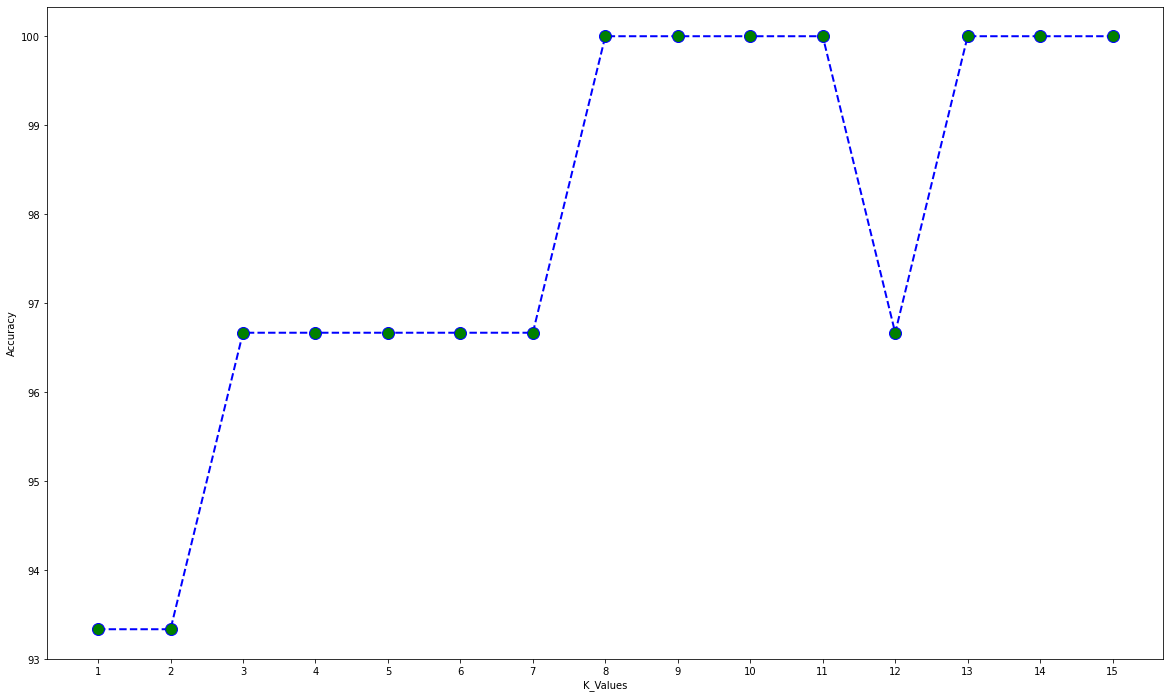

In [20]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,12))
plt.plot(k_value, accuracy_list, linestyle='dashed', color="blue",marker='o', markerfacecolor='green', markersize=12, linewidth=2)
plt.xlabel('K_Values')
plt.xticks(k_value)
plt.ylabel('Accuracy')

### There's 100% accuracy for 8,9,10,11,13,14&15. Let's consider 11

In [41]:
knn = neighbors.KNeighborsClassifier(11, weights='uniform')
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred) #pretty self-explanatory line of code
print(Y_pred)
print(Y_test)
print('Accuracy: ' + str(accuracy*100) + '%')

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1]
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1]
Accuracy: 100.0%


In [42]:
# Making the Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

----

In [99]:
# X_set, Y_set = X_train, Y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contour(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(Y_set)):
#     plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Iris Classifier')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()


----